In [84]:
import math
import numpy as np
from IPython.display import clear_output
import pdb
import time

import matplotlib.pyplot as plt

import torch
from torch import Tensor
from torch import nn
from torch.nn  import functional as F 
from torch.autograd import Variable
from torchdiffeq import odeint_adjoint as odeint
from torch.distributions import MultivariateNormal
use_cuda = torch.cuda.is_available()
from geomloss import SamplesLoss
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import gc
import importlib
import Utils
importlib.reload(Utils)
from Utils import InputMapping, BoundingBox, ImageDataset, SaveTrajectory
from Utils import SaveTrajectory as st
import ODEModel
importlib.reload(ODEModel)
from ODEModel import ODEfunc
from ODEModel import FfjordModel
import LearnTraj
importlib.reload(LearnTraj);
from LearnTraj import learn_trajectory

##
# import math
# import numpy as np
# from IPython.display import clear_output
# import pdb
# import time

# import matplotlib.pyplot as plt

# import torch
# from torch import Tensor
# from torch import nn
# from torch.nn  import functional as F 
# from torch.autograd import Variable
# from torchdiffeq import odeint_adjoint as odeint
# from torch.distributions import MultivariateNormal
# use_cuda = torch.cuda.is_available()
# from geomloss import SamplesLoss
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# import gc
# import importlib
# import Utils
# from Utils import InputMapping, BoundingBox, ImageDataset, SaveTrajectory
# from Utils import SaveTrajectory as st
# import ODEModel
# from ODEModel import ODEfunc
# from ODEModel import FfjordModel


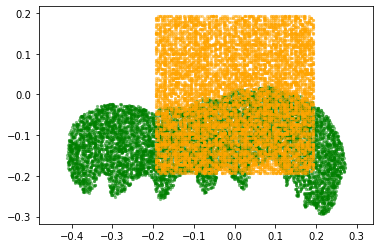

In [88]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
caterpillar = 1-ImageDataset.import_img('caterpillar.png'); caterpillar/=caterpillar.max();
butterfly = 255-ImageDataset.import_img('butterfly.jpg'); butterfly/=butterfly.max();
circle = 255-ImageDataset.import_img('circle.jpeg'); circle/=circle.max();
square = 1-ImageDataset.import_img('square.png'); square/=square.max();
dset1 = ImageDataset(img=caterpillar*1,thresh=.8); 
dset2 = ImageDataset(img=butterfly*1,thresh=.8)
dset3 = ImageDataset(img=circle*1,thresh=.8)
dset4 = ImageDataset(img=square*1,thresh=.8)

n = 10000; 
dat1 = dset1.sample(n); 
dat2 = dset2.sample(n); 
dat3 = dset3.sample(n)*.7;
dat4 = dset4.sample(n);
dat1*=-1; dat1[:,1]-=.1;
dat2*=-1; dat2[:,1]+=.5; 
dat3[:,1]+=.1;

plt.scatter(dat1.detach().numpy()[:,0],dat1.detach().numpy()[:,1],s=10, alpha=0.5, linewidths=0,c='green')
# plt.scatter(dat2.detach().numpy()[:,0],dat2.detach().numpy()[:,1],s=10, alpha=0.5, linewidths=0,c='red')
# plt.scatter(dat3.detach().numpy()[:,0],dat3.detach().numpy()[:,1],s=10, alpha=0.5, linewidths=0,c='magenta')
plt.scatter(dat4.detach().numpy()[:,0],dat4.detach().numpy()[:,1],s=10, alpha=0.5, linewidths=0,c='orange')
plt.axis('equal')
plt.show() 

training with sinkhorn_large_reg
0.001
batch 0 loss tensor(2., device='cuda:0', grad_fn=<AddBackward0>)


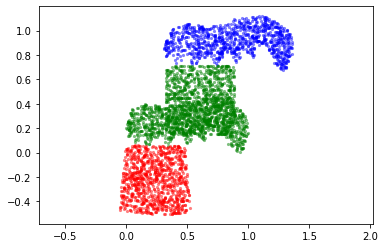

fit time  0.08921670913696289  reg loss time 0.005843162536621094
time elapsed 0.6647295951843262 total time 0.6642680168151855
batch number 0 out of 300
0.001
batch 30 loss tensor(0.0386, device='cuda:0', grad_fn=<AddBackward0>)


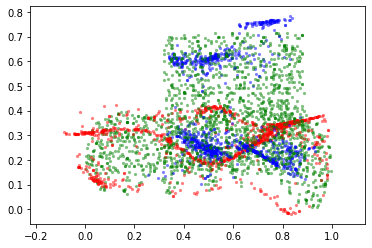

fit time  0.11217880249023438  reg loss time 0.005831480026245117
time elapsed 13.834067821502686 total time 19.181631565093994
batch number 30 out of 300
0.001
batch 60 loss tensor(0.0094, device='cuda:0', grad_fn=<AddBackward0>)


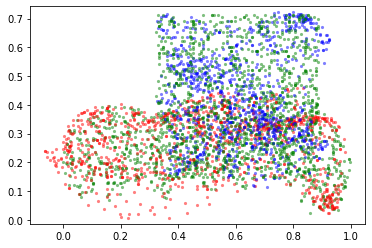

fit time  0.10698390007019043  reg loss time 0.005619049072265625
time elapsed 12.750528812408447 total time 36.88335680961609
batch number 60 out of 300
0.001
batch 90 loss tensor(0.0047, device='cuda:0', grad_fn=<AddBackward0>)


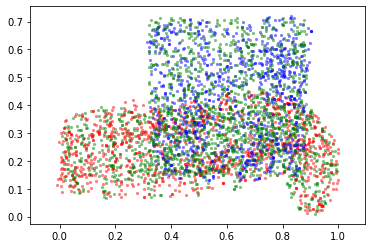

fit time  0.09297919273376465  reg loss time 0.005877017974853516
time elapsed 11.487199068069458 total time 53.58201575279236
batch number 90 out of 300
0.001
batch 120 loss tensor(0.0136, device='cuda:0', grad_fn=<AddBackward0>)


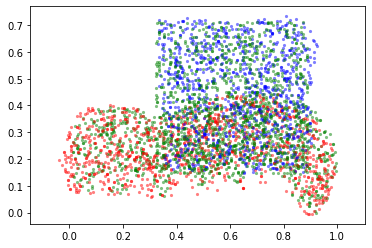

fit time  0.0819401741027832  reg loss time 0.0062563419342041016
time elapsed 10.130266666412354 total time 69.63140749931335
batch number 120 out of 300
0.001
batch 150 loss tensor(0.0097, device='cuda:0', grad_fn=<AddBackward0>)


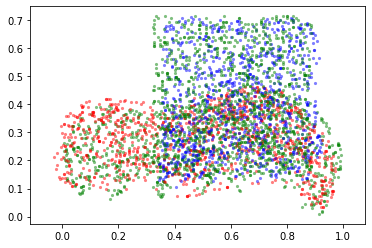

fit time  0.0844430923461914  reg loss time 0.00655817985534668
time elapsed 10.922719240188599 total time 85.72934937477112
batch number 150 out of 300
0.001
batch 180 loss tensor(0.0035, device='cuda:0', grad_fn=<AddBackward0>)


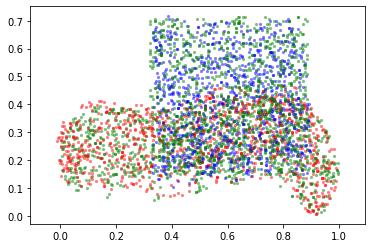

fit time  0.09278512001037598  reg loss time 0.0054895877838134766
time elapsed 11.27898907661438 total time 102.06530523300171
batch number 180 out of 300
0.001
batch 210 loss tensor(0.0069, device='cuda:0', grad_fn=<AddBackward0>)


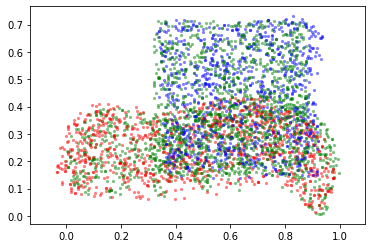

fit time  0.10750293731689453  reg loss time 0.005760669708251953
time elapsed 11.465341329574585 total time 118.36772990226746
batch number 210 out of 300
0.001
batch 240 loss tensor(0.0047, device='cuda:0', grad_fn=<AddBackward0>)


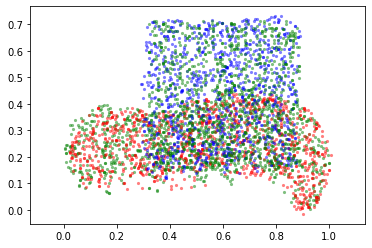

fit time  0.09922432899475098  reg loss time 0.005491971969604492
time elapsed 11.307441711425781 total time 134.31196665763855
batch number 240 out of 300
0.001
batch 270 loss tensor(0.0058, device='cuda:0', grad_fn=<AddBackward0>)


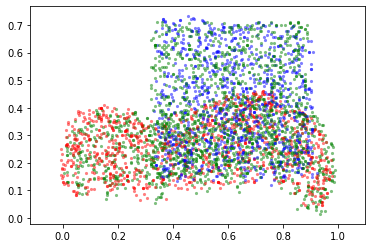

fit time  0.08756041526794434  reg loss time 0.005418300628662109
time elapsed 11.05309510231018 total time 150.0796558856964
batch number 270 out of 300
training with sinkhorn_large_reg
0.001
batch 0 loss tensor(2.0000, device='cuda:0', grad_fn=<AddBackward0>)


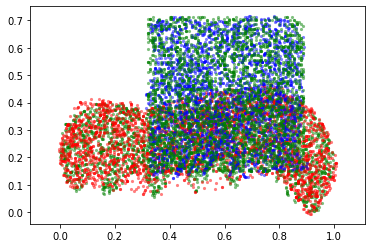

fit time  0.2617182731628418  reg loss time 0.0054819583892822266
time elapsed 1.3421156406402588 total time 1.3420608043670654
batch number 0 out of 300
0.001
batch 30 loss tensor(17.7866, device='cuda:0', grad_fn=<AddBackward0>)


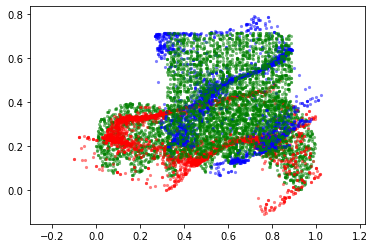

fit time  0.3266584873199463  reg loss time 0.005923748016357422
time elapsed 49.01242733001709 total time 55.175002098083496
batch number 30 out of 300
0.001
batch 60 loss tensor(3.4170, device='cuda:0', grad_fn=<AddBackward0>)


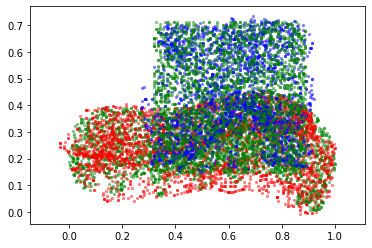

fit time  0.31348633766174316  reg loss time 0.00586390495300293
time elapsed 47.95002007484436 total time 108.2405173778534
batch number 60 out of 300
0.001
batch 90 loss tensor(2.0180, device='cuda:0', grad_fn=<AddBackward0>)


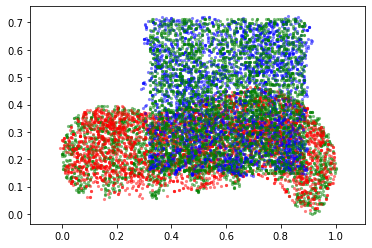

fit time  0.2918398380279541  reg loss time 0.005695343017578125
time elapsed 47.25572943687439 total time 160.4755756855011
batch number 90 out of 300
0.001
batch 120 loss tensor(1.9106, device='cuda:0', grad_fn=<AddBackward0>)


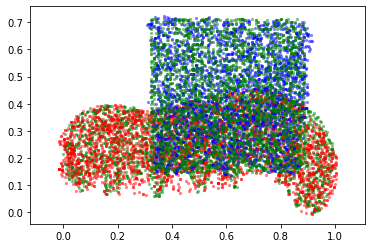

fit time  0.2736949920654297  reg loss time 0.005791902542114258
time elapsed 45.879892349243164 total time 212.5185465812683
batch number 120 out of 300
0.001
batch 150 loss tensor(1.9174, device='cuda:0', grad_fn=<AddBackward0>)


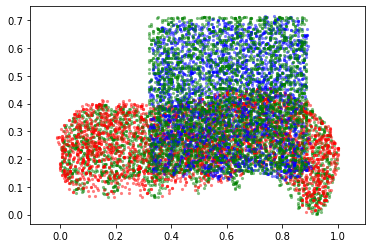

fit time  0.2743527889251709  reg loss time 0.0058863162994384766
time elapsed 45.05453372001648 total time 262.4867401123047
batch number 150 out of 300
0.001
batch 180 loss tensor(2.2567, device='cuda:0', grad_fn=<AddBackward0>)


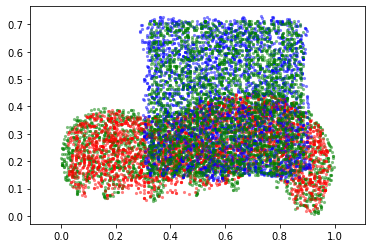

fit time  0.28975963592529297  reg loss time 0.005952119827270508
time elapsed 46.30923819541931 total time 313.6795027256012
batch number 180 out of 300
0.001
batch 210 loss tensor(3.4517, device='cuda:0', grad_fn=<AddBackward0>)


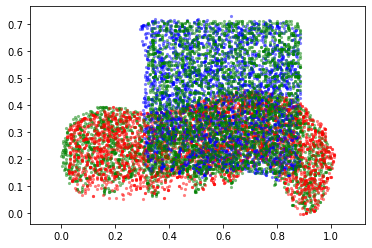

fit time  0.2878124713897705  reg loss time 0.005896568298339844
time elapsed 46.650455713272095 total time 365.43447947502136
batch number 210 out of 300
0.001
batch 240 loss tensor(5.6793, device='cuda:0', grad_fn=<AddBackward0>)


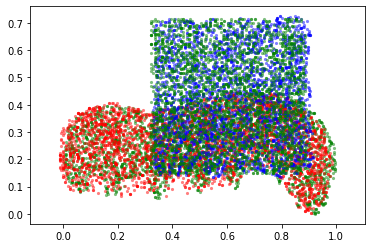

fit time  0.27941393852233887  reg loss time 0.0070819854736328125
time elapsed 47.20682382583618 total time 417.67237877845764
batch number 240 out of 300
0.0005
batch 270 loss tensor(2.0061, device='cuda:0', grad_fn=<AddBackward0>)


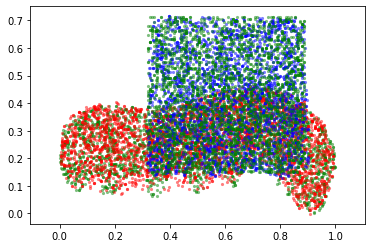

fit time  0.320354700088501  reg loss time 0.006011009216308594
time elapsed 46.90285658836365 total time 469.54795598983765
batch number 270 out of 300


<Figure size 432x288 with 0 Axes>

In [89]:
z_target = ImageDataset.normalize_samples(torch.stack((dat1, dat4)).to(device));
model = FfjordModel(); 
# model.load_state('models/seq_state420_time_31.615391731262207.tar');
# model.load_state('models/state310_time_22.49951934814453.tar');
# model.load_state('models/state_start11.tar');
# for my_loss in ['sinkhorn_small_reg']:
# my_loss = 'sinkhorn_small_reg';
my_loss = 'sinkhorn_large_reg';
# %prun 
model, losses, separate_losses = learn_trajectory(z_target, my_loss=my_loss,n_iters = 900,n_subsample=1000, model=model, save=True)
st.save_trajectory(model,z_target,my_loss, savedir='imgs', nsteps=101, memory=0.01, n=500)
st.save_trajectory(model,z_target,my_loss, savedir='imgs', nsteps=101, memory=0.01, n=500,reverse=True)

In [ ]:
st.save_trajectory(model,z_target,my_loss, savedir='imgs', nsteps=101, memory=0.01, n=500)
st.save_trajectory(model,z_target,my_loss, savedir='imgs', nsteps=101, memory=0.01, n=500,reverse=True)

<class 'torch.Tensor'> torch.Size([512, 143])
torch.Size([140])


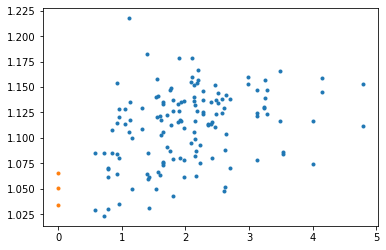

In [96]:
# test what weights are given to what frequencies in the first layer
for param in model.parameters():
    print(type(param.data), param.size())
    pdat = param.data;
    break;    
pmags = torch.norm(param.data,p=2,dim=0);
freqs = model.time_deriv_func.imap.B;
nf = freqs.shape[0];
nd = (pmags.shape[0]-2*nf)

fmags = torch.norm(freqs,p=2,dim=1);
xyfreqs = torch.cat([fmags, fmags],dim=0);
print(xyfreqs.size())

plt.plot(xyfreqs.cpu().numpy(), pmags[0:(nf*2)].cpu().numpy(),'.')
plt.plot(np.zeros(nd), pmags[(nf*2):].cpu().numpy(),'.')

# # freqs
# # fmags

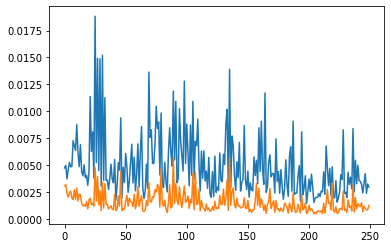

In [95]:
plt.plot(losses[1:]); 
plt.plot(separate_losses[0,50:]); 
plt.plot(separate_losses[1,50:]); 
# plt.plot(separate_losses[2,50:]); 
# plt.plot(separate_losses[3,50:]); 
# plt.plot(separate_losses[4,50:]); 
# plt.plot(separate_losses[5,50:]); 
# plt.plot(separate_losses[6,0:]);
plt.show()

In [98]:
## visualize ending sinkhorn costs as gradient on point clouds
# z_target = ImageDataset.normalize_samples(torch.stack((dat1,dat4)).to(device));
T = z_target.shape[0];

z_t = model(z_target[0,:,:], integration_times = torch.linspace(0,1,2).to(device),reverse=False);
z_t_b = model(z_target[T-1,:,:], integration_times = torch.linspace(0,1,2).to(device),reverse=True);
forward = z_t[T-1,:,:].cpu().detach().numpy();
backward = z_t_b[T-1,:,:].cpu().detach().numpy();

my_loss_f = SamplesLoss("sinkhorn", p=2, blur=0.01);
loss_f = my_loss_f(z_target[T-1,:,:], z_t[T-1,:,:])
loss_b = my_loss_f(z_target[0,:,:], z_t_b[T-1,:,:])

graddirs_f = torch.autograd.grad(loss_f, z_t)[0][T-1,:,:]
graddirs_b = torch.autograd.grad(loss_b, z_t_b)[0][T-1,:,:]

pos_f = z_t.cpu().detach().numpy()
pos_b = z_t_b.cpu().detach().numpy()
dirs_f = graddirs_f.cpu().detach().numpy()
dirs_b = graddirs_b.cpu().detach().numpy()

import os
plt.axis('equal')
plt.scatter(pos_b[0,:,0], pos_b[0,:,1], s=10, alpha=.5, linewidths=0, c='green', edgecolors='black')
plt.scatter(forward[:,0], forward[:,1], s=10, alpha=.5, linewidths=0, c='red', edgecolors='black')
plt.quiver(pos_f[T-1,:,0], pos_f[T-1,:,1], dirs_f[:,0], dirs_f[:,1],scale=.0001)
plt.savefig(os.path.join('./', f"viz_backward.jpg"),dpi=400); plt.clf()

plt.axis('equal')
plt.scatter(pos_f[0,:,0], pos_f[0,:,1], s=10, alpha=.5, linewidths=0, c='green', edgecolors='black')
plt.scatter(backward[:,0], backward[:,1], s=10, alpha=.5, linewidths=0, c='red', edgecolors='black')
plt.quiver(pos_b[T-1,:,0], pos_b[T-1,:,1], dirs_b[:,0], dirs_b[:,1],scale=.0001)
plt.savefig(os.path.join('./', f"viz_forward.jpg"),dpi=400); plt.clf()


<Figure size 432x288 with 0 Axes>

(tensor(0.0290, device='cuda:0'), tensor(0.0290, device='cuda:0'))

In [ ]:
#trying other shapes

square = np.zeros([20,20])
square[6:14,:8] = 1

two_square = np.zeros([20,20])
two_square[:5,14:] = 1
two_square[15:,14:] = 1


annulus = import_img('annulus.png')
circle = 255-import_img('circle.jpeg')

dset = ImageDataset(img=square)
dset1 = ImageDataset(img=two_square)

n = 500
dat = dset.sample(n)
dat1 = dset1.sample(n)
plt.scatter(dat.detach().numpy()[:,0],dat.detach().numpy()[:,1],s=2.3, alpha=0.1, linewidths=5,c='green')
plt.scatter(dat1.detach().numpy()[:,0],dat1.detach().numpy()[:,1],s=2.3, alpha=0.1, linewidths=5,c='red')
plt.show() 

In [ ]:
# make half moon dataset
import sklearn.datasets

moons, labels = sklearn.datasets.make_moons(n,noise=.1) #generates two half moons
mask = (labels == 0)
one_moon = moons[mask,:] # only keep one moon

def rot_mat(theta0):
    #computes rotation matrix of angle theta
    return np.array([[np.cos(theta0),-np.sin(theta0)],[np.sin(theta0),np.cos(theta0)]])

theta0 = np.pi/2
theta1 = np.pi

rot0 = rot_mat(theta0)
rot1 = rot_mat(theta1)

# apply rotation to the moon
one_moon_rot0 = np.dot(one_moon,rot0)
one_moon_rot1 = np.dot(one_moon,rot1)

In [ ]:
#visualize rotated moons

plt.scatter(one_moon[:,0],one_moon[:,1], color='blue')
plt.scatter(one_moon_rot0[:,0],one_moon_rot0[:,1], color='orange')
plt.scatter(one_moon_rot1[:,0],one_moon_rot1[:,1], color='green')

In [ ]:
# with three timesteps

dat = torch.tensor(one_moon,dtype=torch.float)
dat0 = torch.tensor(one_moon_rot0,dtype=torch.float)
dat1 = torch.tensor(one_moon_rot1,dtype=torch.float)

dat_tuple = (dat,dat0,dat1)
z_target = torch.stack(dat_tuple).to(device)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for my_loss in ['sinkhorn_large_reg','sinkhorn_small_reg','energy_dist']:
    model = learn_trajectory(z_target, my_loss=my_loss,n_batch=500)
    save_trajectory(model,z_target,my_loss, savedir='imgs', nsteps=101, memory=0.01, n=1000)
    trajectory_to_video(my_loss)


In [ ]:
# with two timesteps


dat_tuple = (dat,dat0)
z_target = torch.stack(dat_tuple).to(device)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for my_loss in ['sinkhorn_large_reg','sinkhorn_small_reg','energy_dist']:
    model = learn_trajectory(z_target, my_loss=my_loss,n_batch=500)
    save_trajectory(model,z_target,my_loss, savedir='imgs', nsteps=101, memory=0.01, n=1000)
    trajectory_to_video(my_loss)


In [ ]:
losses